In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt

In [68]:
n = 100
p = 10000
n_groups = int(p / 50)
alpha = 1.0
seed = 0

np.random.seed(seed)
X, beta, y, A, r, groups, group_sizes = generate_group_lasso_data(n, p, n_groups).values()

In [69]:
# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(A, r, groups, group_sizes, alpha, log10_min_ratio=-2, max_cds=int(1e6))

In [70]:
%%time
gl_out = group_lasso(pack)

CPU times: user 217 ms, sys: 276 ms, total: 493 ms
Wall time: 72.2 ms


In [71]:
gl_out['rsqs'] / np.linalg.norm(y / np.sqrt(n)) ** 2

array([0.        , 0.08153747, 0.15583146, 0.22352546, 0.28520579,
       0.3414067 , 0.39261496, 0.43927413, 0.48178833, 0.52052578,
       0.55582202, 0.58798276, 0.61728655, 0.6439872 , 0.66831597,
       0.69048359, 0.71068204, 0.72908627, 0.74585568, 0.76113552,
       0.77505811, 0.78774405, 0.7993032 , 0.80983567, 0.81943268,
       0.82817734, 0.83614539, 0.84340582, 0.85002152, 0.85604977,
       0.86154276, 0.86654807, 0.87110904, 0.87526515, 0.87905238,
       0.88250352, 0.88564845, 0.88851439, 0.89112613, 0.89350628,
       0.89567544, 0.89765238, 0.89945418, 0.90109643, 0.90259333,
       0.90395783, 0.9052017 , 0.90633569, 0.9073696 , 0.90831234,
       0.90917206, 0.90995615, 0.91067137, 0.91132388, 0.91191929,
       0.91246271, 0.9129588 , 0.91341182, 0.91382564, 0.91420378,
       0.91454947, 0.91486566, 0.91515501, 0.91541997, 0.91566277,
       0.91588544, 0.91608985, 0.91627768, 0.91645049, 0.91660969,
       0.91675657, 0.91689231, 0.917018  , 0.91713463, 0.91724

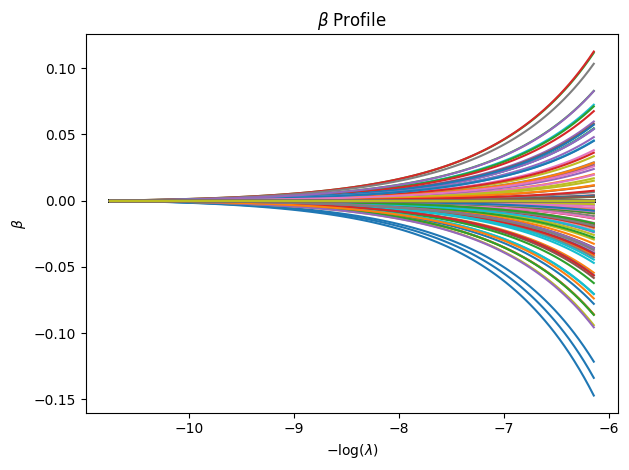

In [79]:
worst_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == worst_idx: continue
    plt.plot(-np.log(gl_out['lmdas']), gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()